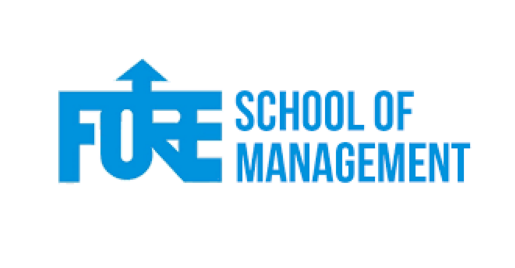

In [109]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\Arnav\Desktop\FORE Documents\FORE Logo.png")

imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [43]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
#Importing Dataset
Df=pd.read_csv(r"C:\Users\Arnav\Desktop\MLM Dataset.csv")
Df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [4]:
#Display Basic Information About Dataset
print("Dataset Overview:")
print(Df.info())
print("\nFirst 5 Rows:")
print(Df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes:

In [5]:
#Check for missing values 
print("\nMissing Values:")
print(Df.isnull().sum())


Missing Values:
year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64


In [6]:
#Check for duplicate rows
duplicates = Df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    Df = data.drop_duplicates()
    print("Duplicates removed.")


Number of duplicate rows: 0


In [7]:
#Ensure numeric columns are properly formatted
numeric_columns = ['price']  
for col in numeric_columns:
    if col in Df.columns:
        Df[col] = pd.to_numeric(Df[col], errors='coerce')

In [8]:
#Clean categorical data
categorical_columns = ['country', 'page 1 (main category)', 'colour', 'model photography']
for col in categorical_columns:
    if col in Df.columns:
        Df[col] = Df[col]

In [9]:
#Handle missing values
Df.dropna(inplace=True)

In [10]:
#Detect and handle outliers (e.g., using IQR for numeric columns)
for col in numeric_columns:
    if col in Df.columns:
        Q1 = Df[col].quantile(0.25)
        Q3 = Df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        Df = Df[(Df[col] >= lower_bound) & (Df[col] <= upper_bound)]

In [11]:
#Rename columns for clarity
column_renaming = {
    'year':'Year',
    'month':'Month',
    'day':'Day',
    'order':'Order',
    'country':'Country',
    'session ID':'Session ID',
    'page 1 (main category)': 'Product Category',
    'page 2 (clothing model)': 'Clothing Model',
    'colour':'Colour',
    'location':'Location',    
    'model photography': 'Photography Type',
    'price':'Price',
    'price 2': 'Is Higher Than Average Price',
    'page':'Page',
}
Df.rename(columns=column_renaming, inplace=True)

C:\Users\Arnav\AppData\Local\Temp\ipykernel_24236\3758594751.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df.rename(columns=column_renaming, inplace=True)


In [12]:
#Exporting Cleaned Dataset
cleaned_data_path = r'C:\Users\Arnav\Desktop\Dataset.csv'
Df.to_csv(cleaned_data_path, index=False)
print(f"Cleaned dataset saved to {cleaned_data_path}")

Cleaned dataset saved to C:\Users\Arnav\Desktop\Dataset.csv


In [13]:
#Summary of Cleaned Data
print("\nCleaned Dataset Overview:")
print(Df.info())
print("\nSample Data:")
print(Df.head())


Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 163551 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Year                          163551 non-null  int64 
 1   Month                         163551 non-null  int64 
 2   Day                           163551 non-null  int64 
 3   Order                         163551 non-null  int64 
 4   Country                       163551 non-null  int64 
 5   Session ID                    163551 non-null  int64 
 6   Product Category              163551 non-null  int64 
 7   Clothing Model                163551 non-null  object
 8   Colour                        163551 non-null  int64 
 9   Location                      163551 non-null  int64 
 10  Photography Type              163551 non-null  int64 
 11  Price                         163551 non-null  int64 
 12  Is Higher Than Average Price  163551

In [14]:
#Descriptive Analysis for Relevant Columns
print("\nDescriptive Analysis:\n")

#Numerical Columns Analysis
numerical_columns = Df.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_columns) > 0:
    print("Numerical Columns:")
    print(Df[numerical_columns].describe().transpose())
    
#Categorical Columns Analysis
categorical_columns = Df.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:
    print("\nCategorical Columns:")
    for col in categorical_columns:
        print(f"\nColumn: {col}")
        print(Df[col].value_counts())


Descriptive Analysis:

Numerical Columns:
                                 count          mean          std     min  \
Year                          163551.0   2008.000000     0.000000  2008.0   
Month                         163551.0      5.584497     1.327705     4.0   
Day                           163551.0     14.523996     8.831615     1.0   
Order                         163551.0      9.841297    13.512521     1.0   
Country                       163551.0     26.973904     7.123642     1.0   
Session ID                    163551.0  12051.293083  7006.042423     1.0   
Product Category              163551.0      2.417313     1.140943     1.0   
Colour                        163551.0      6.265605     4.245865     1.0   
Location                      163551.0      3.261233     1.723018     1.0   
Photography Type              163551.0      1.263129     0.440333     1.0   
Price                         163551.0     43.353388    11.914274    18.0   
Is Higher Than Average Price  163

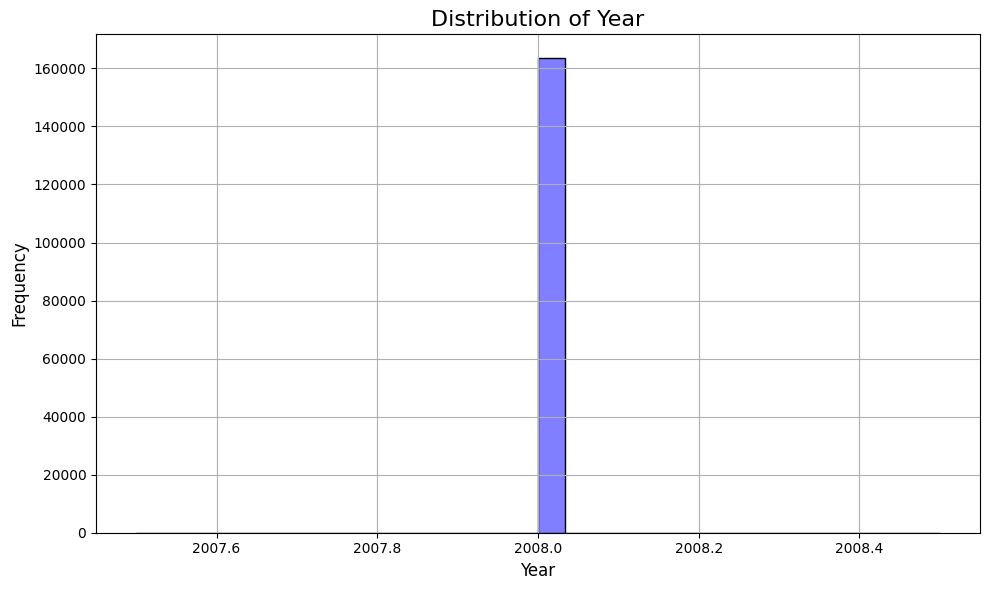

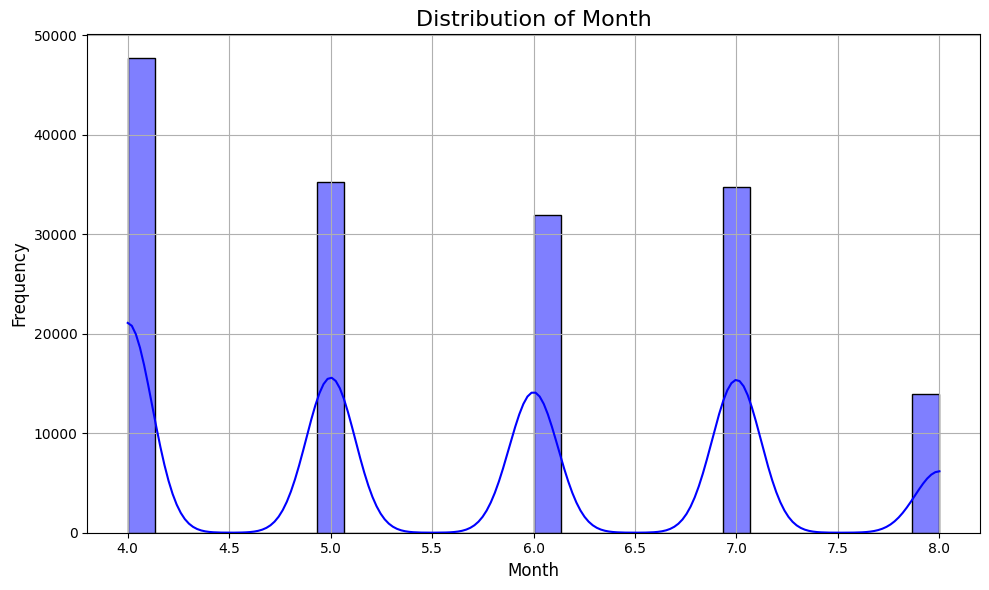

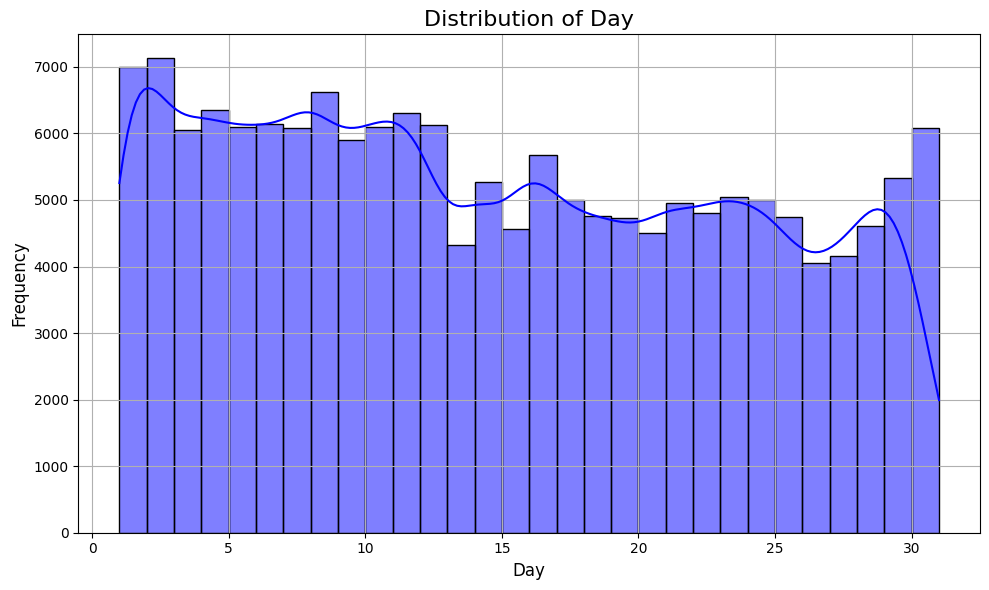

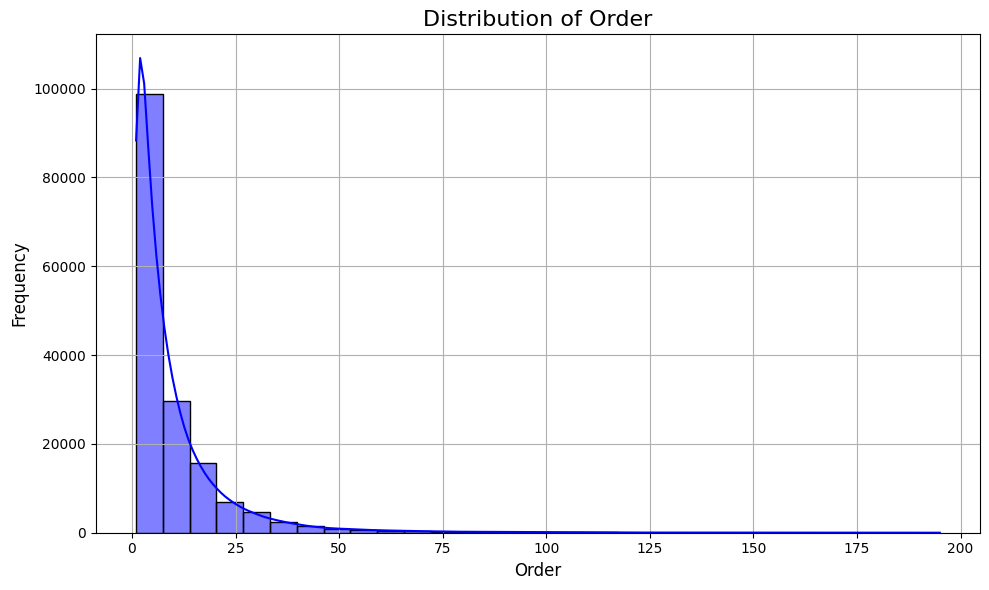

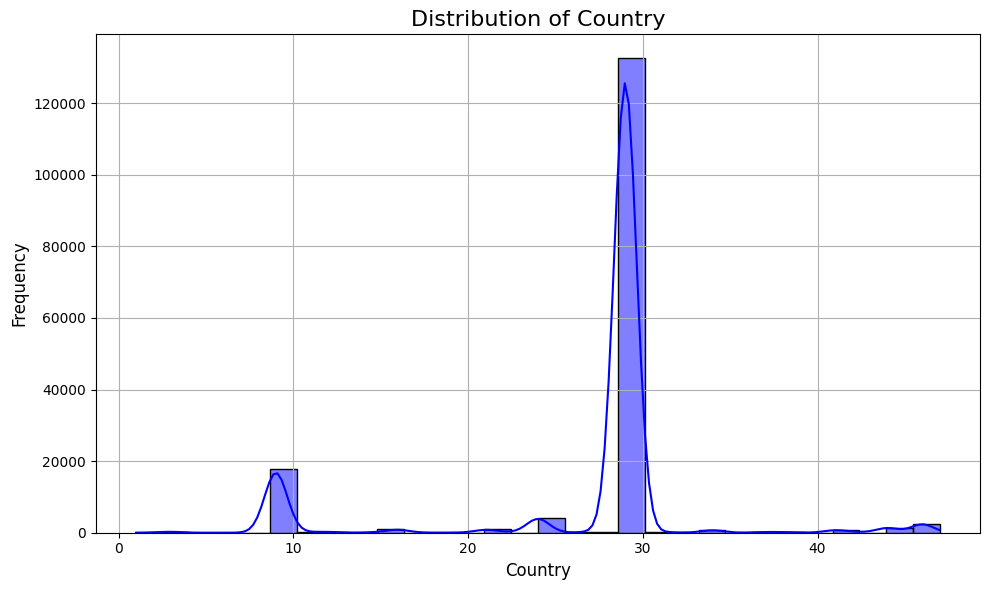

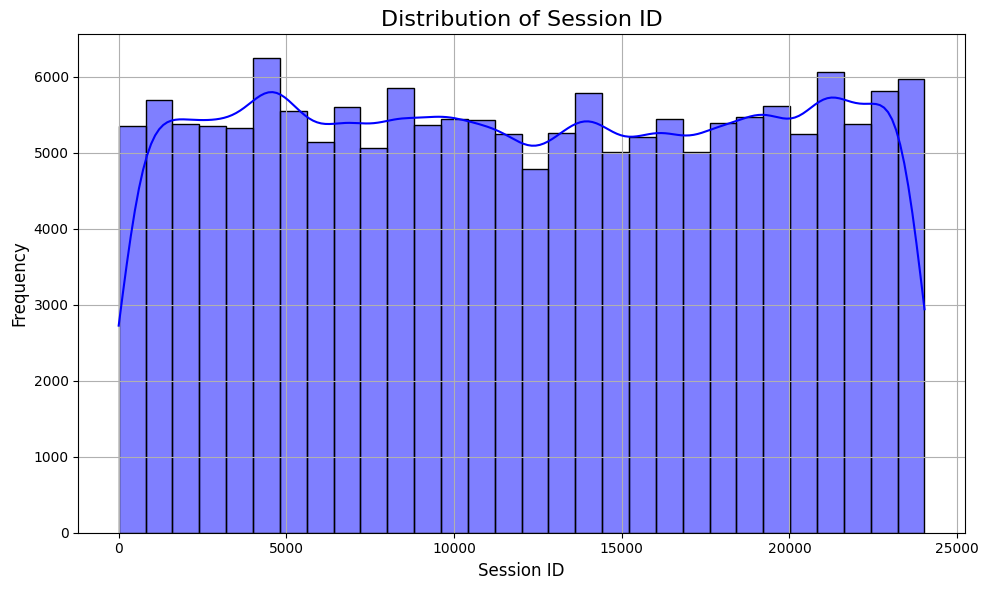

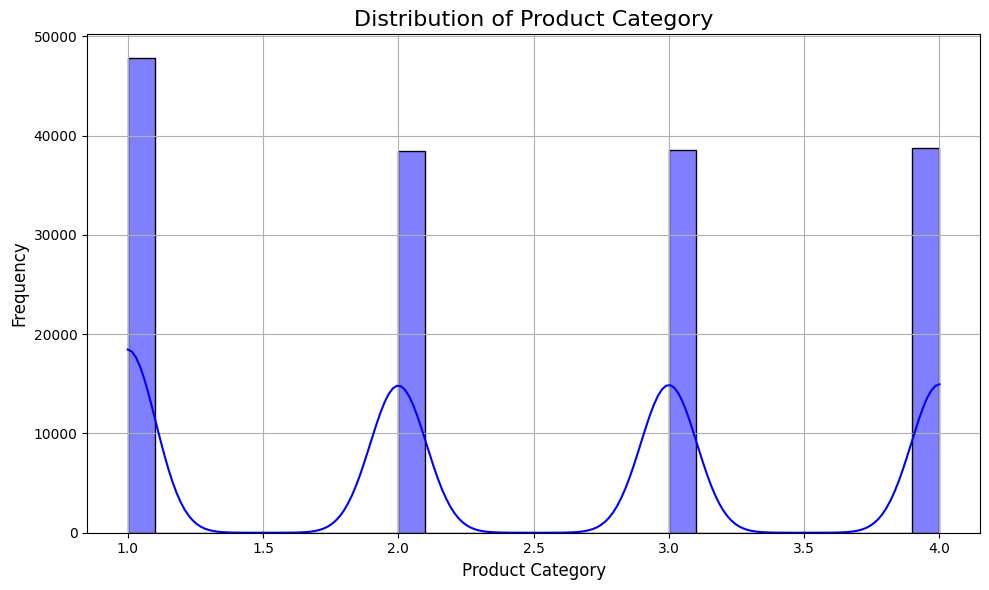

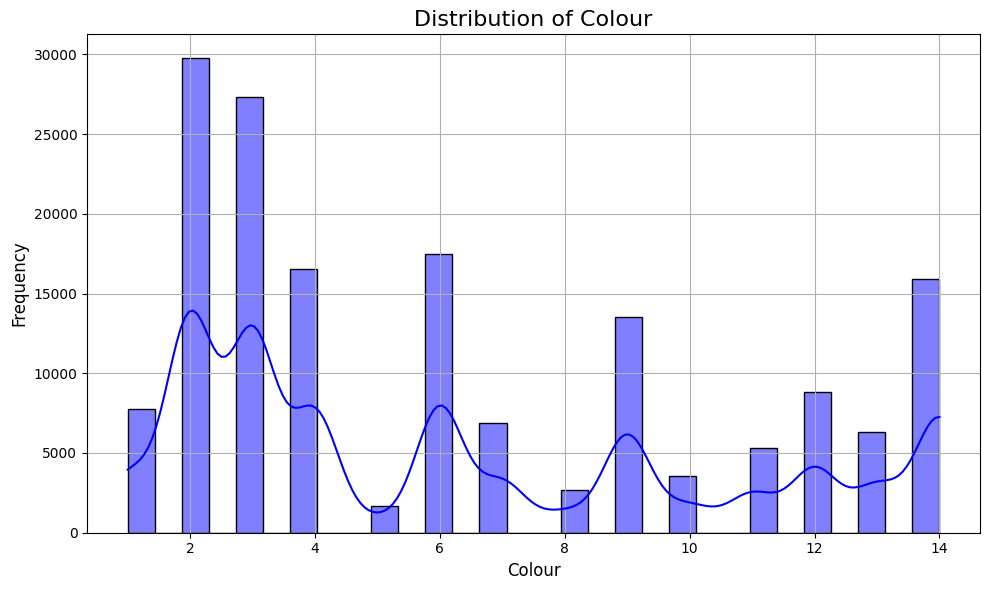

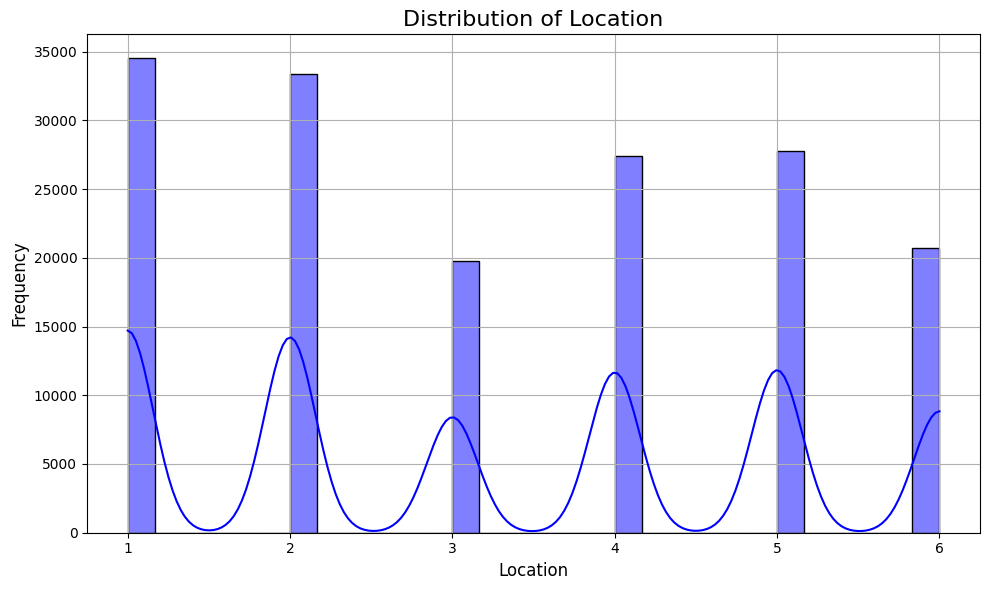

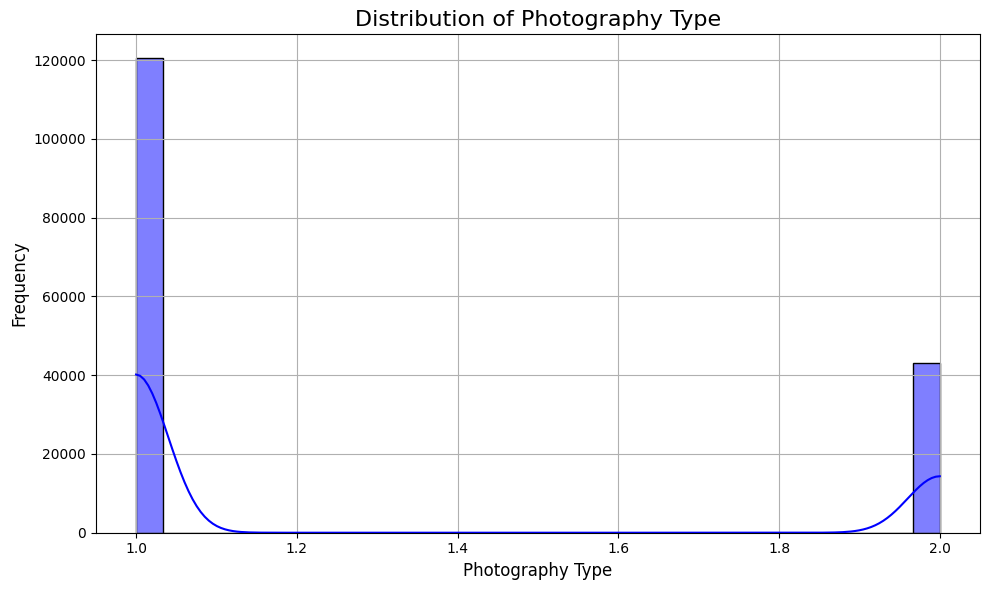

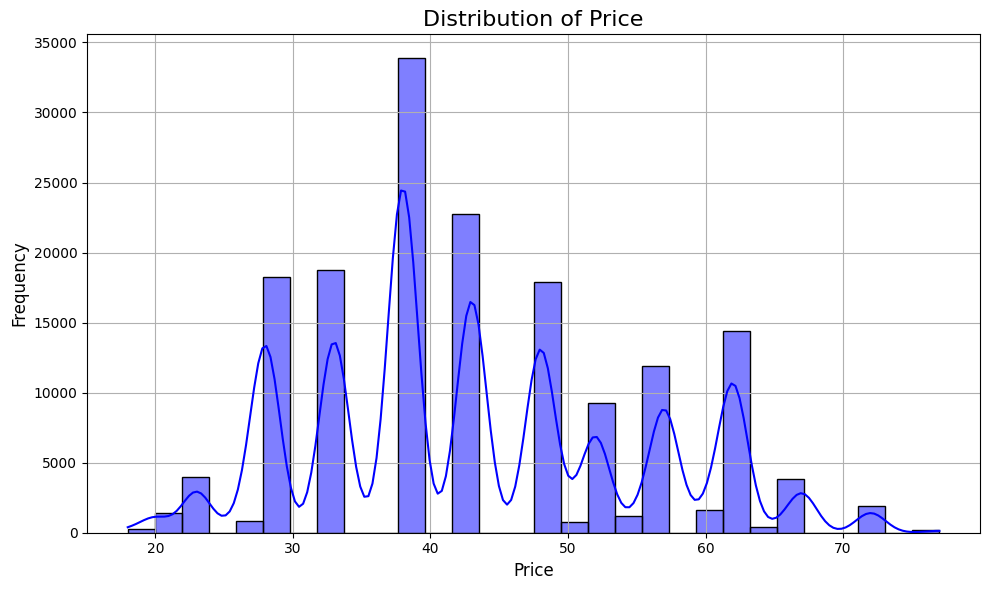

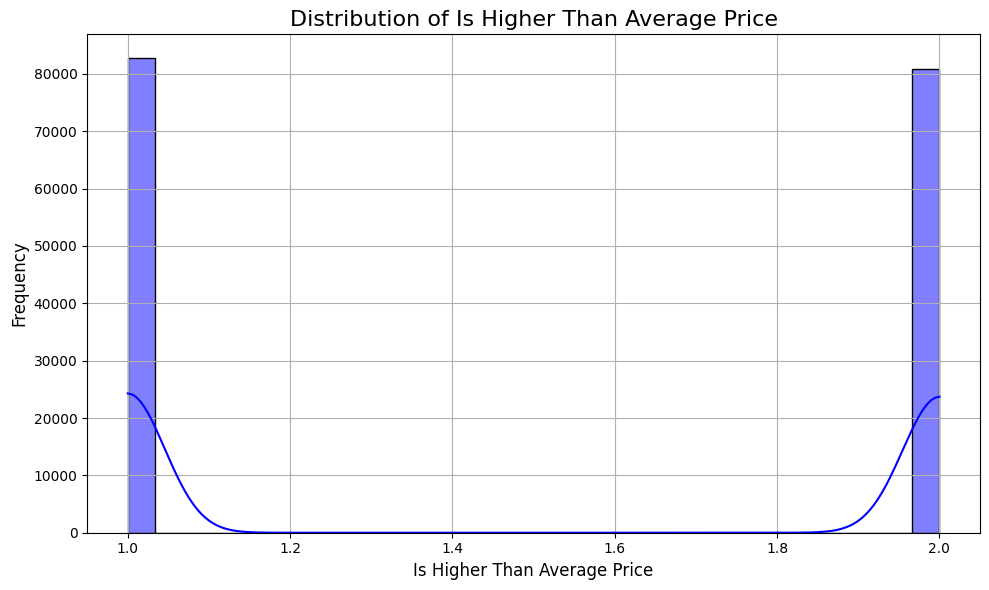

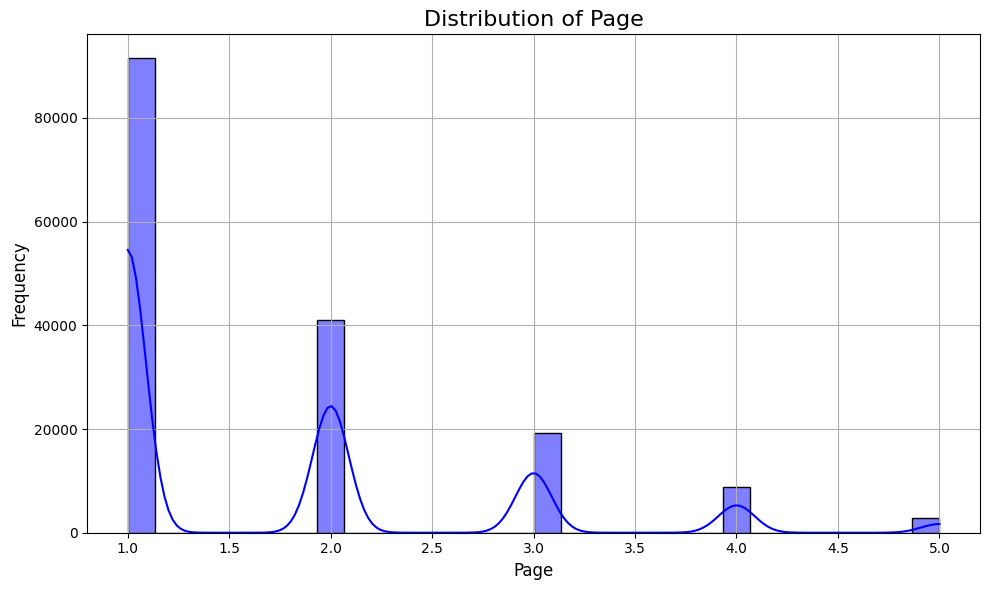

C:\Users\Arnav\AppData\Local\Temp\ipykernel_24236\4062835675.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Df, y=col, order=Df[col].value_counts().index, palette='viridis')


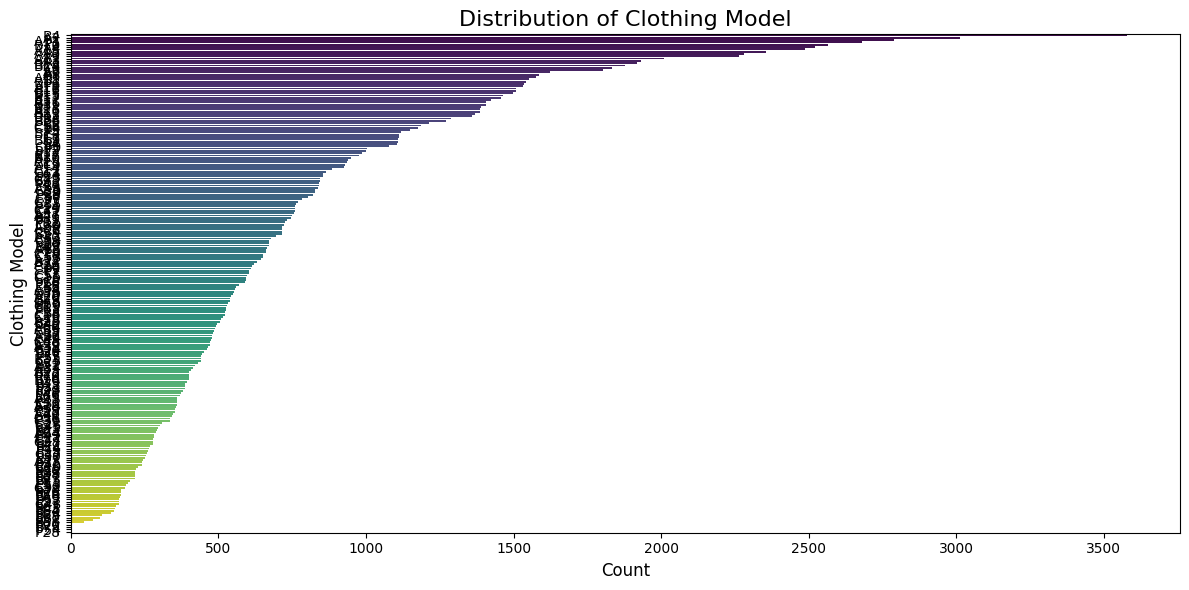

In [15]:
#Visualization of Numerical Data Distributions
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(Df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
#Visualization of Categorical Data
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=Df, y=col, order=Df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_24236\2215502055.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Total_Activity', data=daily_activity, palette='viridis')


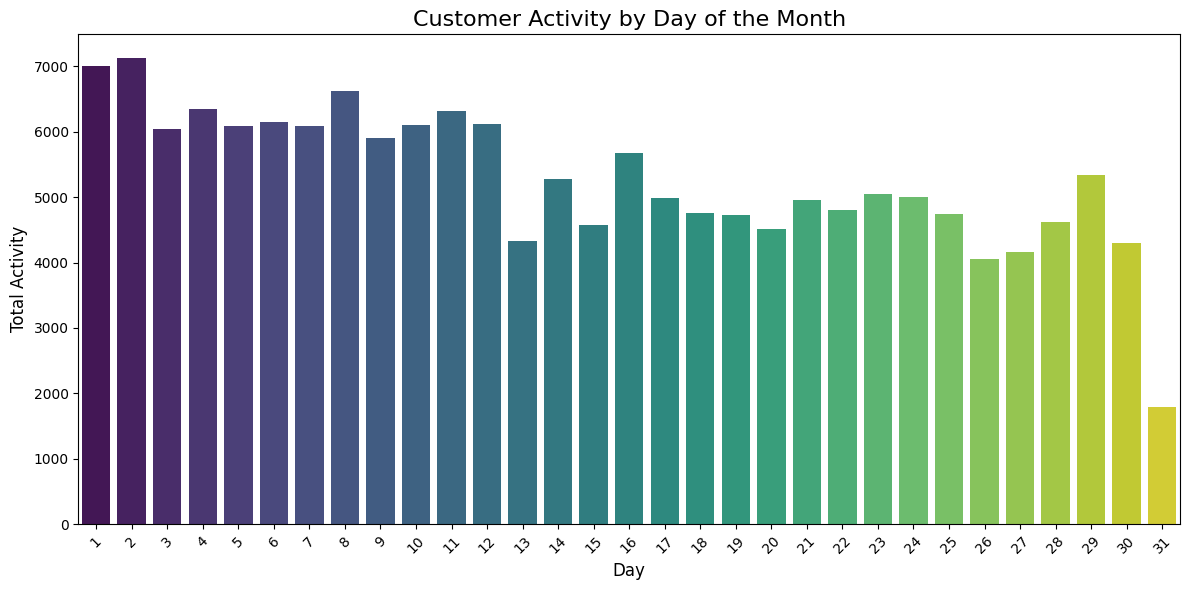

In [16]:
#Temporal Trends Analysis
if 'Day' in Df.columns:
    # Aggregate data by day of the month
    daily_activity = Df['Day'].value_counts().reset_index()
    daily_activity.columns = ['Day', 'Total_Activity']
    daily_activity.sort_values(by='Day', inplace=True)

    # Bar plot for total activity by day of the month
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Day', y='Total_Activity', data=daily_activity, palette='viridis')
    plt.title('Customer Activity by Day of the Month', fontsize=16)
    plt.xlabel('Day', fontsize=12)
    plt.ylabel('Total Activity', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_24236\1021263840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Country'] = Df['Country']
C:\Users\Arnav\AppData\Local\Temp\ipykernel_24236\1021263840.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Total_Activity', data=country_data, palette='viridis')


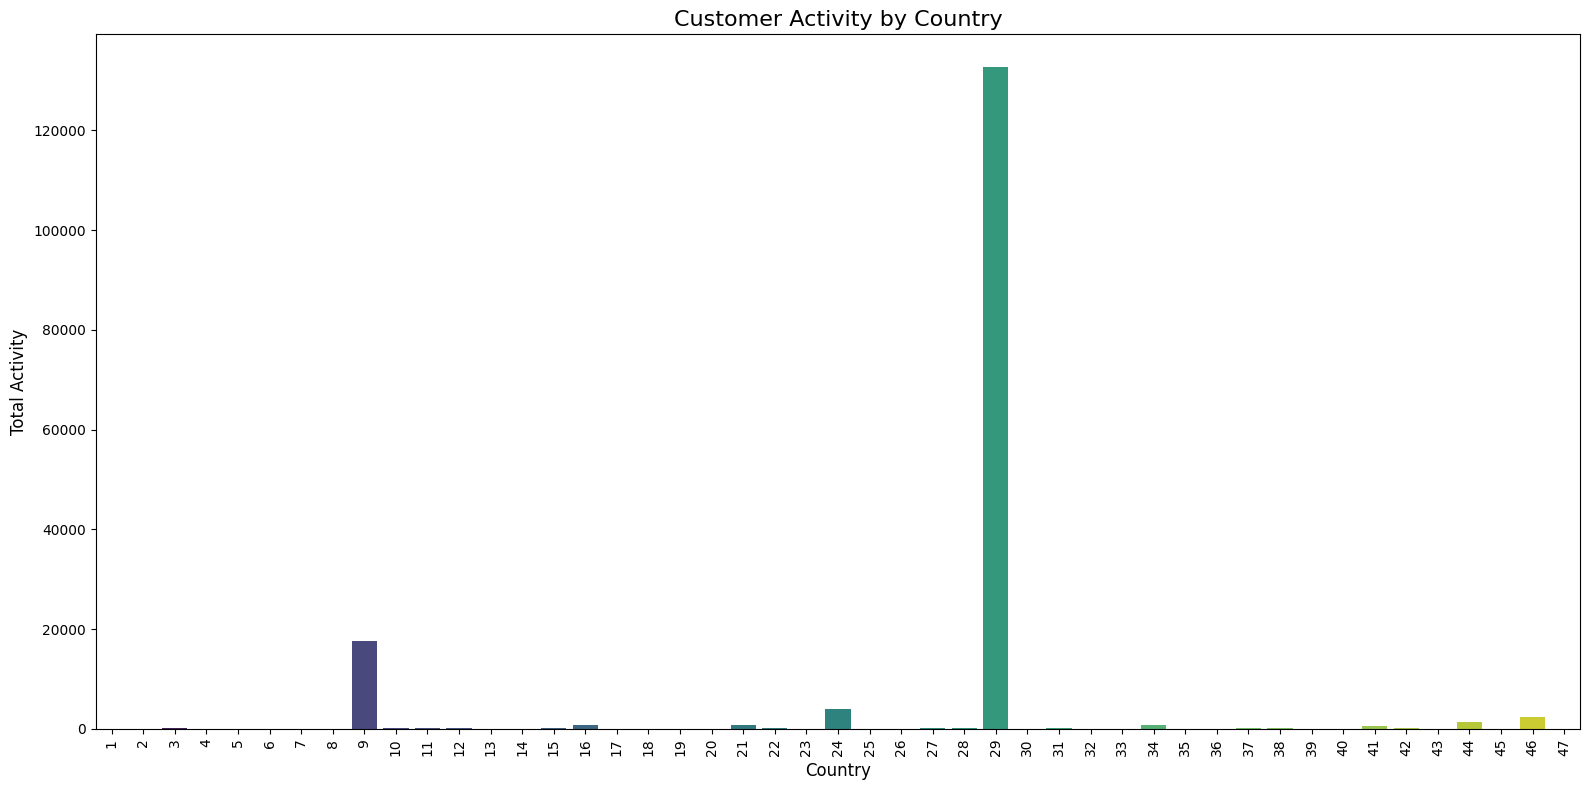

In [17]:
#Geographic Insights
if 'Country' in Df.columns:
    # Ensure country names are consistent
    Df['Country'] = Df['Country']

    # Aggregate data by country
    country_data = Df['Country'].value_counts().reset_index()
    country_data.columns = ['Country', 'Total_Activity']

    # Sort by activity for better visualization
    country_data.sort_values(by='Total_Activity', ascending=False, inplace=True)

    # Bar plot for activity by country
    plt.figure(figsize=(16, 8))
    sns.barplot(x='Country', y='Total_Activity', data=country_data, palette='viridis')
    plt.title('Customer Activity by Country', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Total Activity', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

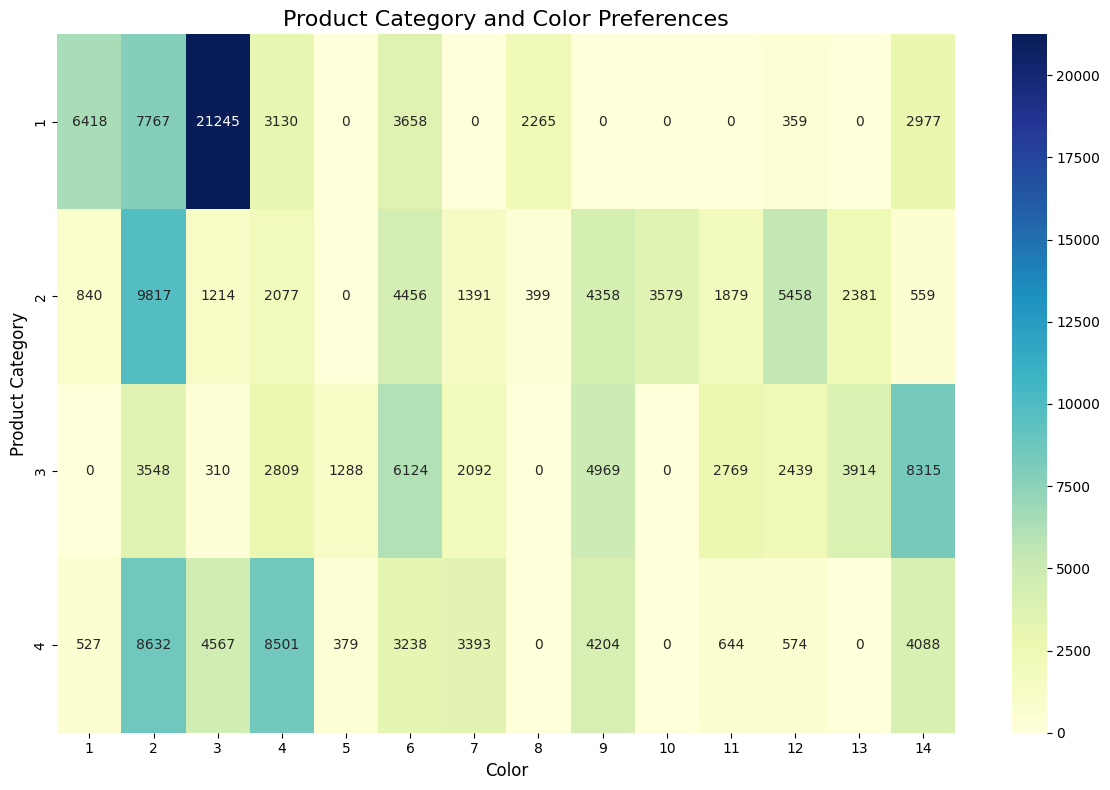

In [18]:
#Product Insights
if 'Product Category' in Df.columns and 'Colour' in Df.columns:
    # Count data by main category and color
    category_color_data = Df.groupby(['Product Category', 'Colour']).size().unstack(fill_value=0)

    # Heatmap for product categories and color preferences
    plt.figure(figsize=(12, 8))
    sns.heatmap(category_color_data, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Product Category and Color Preferences', fontsize=16)
    plt.xlabel('Color', fontsize=12)
    plt.ylabel('Product Category', fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_24236\485276848.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Total_Activity', data=location_data, palette='coolwarm')


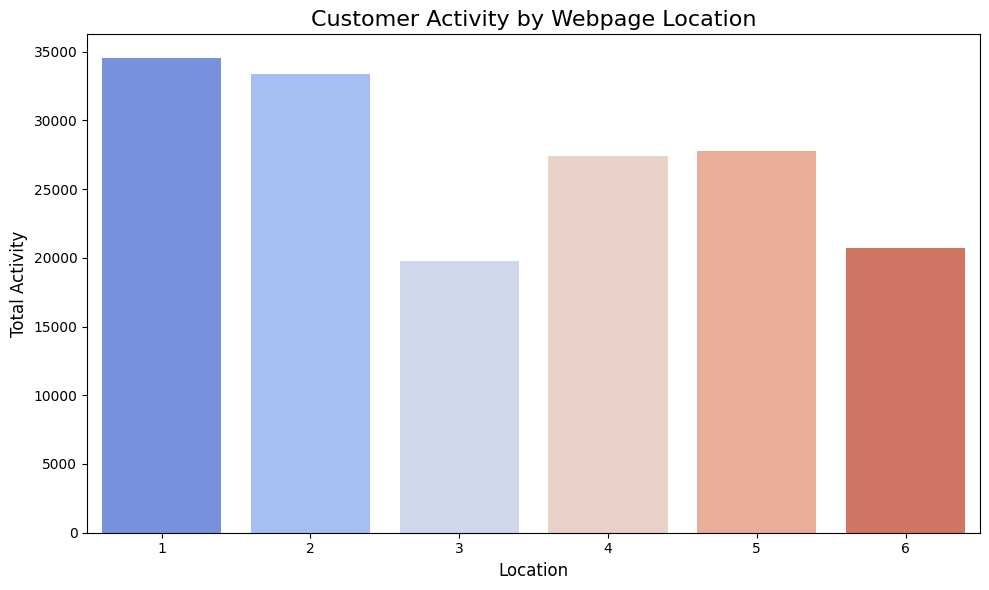

In [19]:
#Webpage Navigation Analysis
if 'Location' in Df.columns:
    # Count data by location
    location_data = Df['Location'].value_counts().reset_index()
    location_data.columns = ['Location', 'Total_Activity']

    # Bar plot for clicks by location
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Location', y='Total_Activity', data=location_data, palette='coolwarm')
    plt.title('Customer Activity by Webpage Location', fontsize=16)
    plt.xlabel('Location', fontsize=12)
    plt.ylabel('Total Activity', fontsize=12)
    plt.tight_layout()
    plt.show()


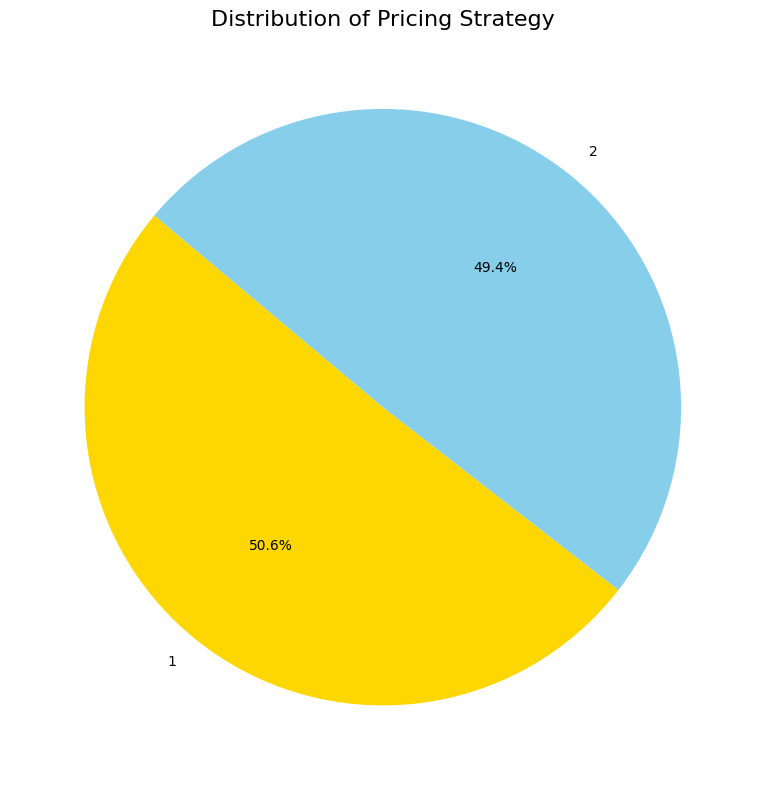

In [20]:
#Pricing Strategies Analysis
if 'Is Higher Than Average Price' in Df.columns:
    # Count data by pricing strategy
    pricing_data = Df['Is Higher Than Average Price'].value_counts().reset_index()
    pricing_data.columns = ['Higher Than Average Price', 'Total_Activity']

    # Pie chart for pricing strategy
    plt.figure(figsize=(8, 8))
    plt.pie(pricing_data['Total_Activity'], labels=pricing_data['Higher Than Average Price'], autopct='%1.1f%%', startangle=140, colors=['gold', 'skyblue'])
    plt.title('Distribution of Pricing Strategy', fontsize=16)
    plt.tight_layout()
    plt.show()


Machine Learning Models

In [21]:
#Remove the 'Clothing Model' column
if 'Clothing Model' in Df.columns:
    Df.drop('Clothing Model', axis=1, inplace=True)
    print("'Clothing Model' column removed.")

'Clothing Model' column removed.


C:\Users\Arnav\AppData\Local\Temp\ipykernel_24236\1106635295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df.drop('Clothing Model', axis=1, inplace=True)


In [22]:
Df

,Year,Month,Day,Order,Country,Session ID,Product Category,Colour,Location,Photography Type,Price,Is Higher Than Average Price,Page
0,2008,4,1,1,29,1,1,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,12,1,1,43,1,1


In [23]:
#Summary of Cleaned Dataset
print("Cleaned Dataset Overview:")
print(Df.info())

Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 163551 entries, 0 to 165473
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Year                          163551 non-null  int64
 1   Month                         163551 non-null  int64
 2   Day                           163551 non-null  int64
 3   Order                         163551 non-null  int64
 4   Country                       163551 non-null  int64
 5   Session ID                    163551 non-null  int64
 6   Product Category              163551 non-null  int64
 7   Colour                        163551 non-null  int64
 8   Location                      163551 non-null  int64
 9   Photography Type              163551 non-null  int64
 10  Price                         163551 non-null  int64
 11  Is Higher Than Average Price  163551 non-null  int64
 12  Page                          163551 non-null  int6

In [24]:
Df.loc[:, numerical_columns] = Df[numerical_columns].fillna(Df[numerical_columns].median())

In [108]:
#Tending to Product Category as the Target Variable
X = Df.drop('Product Category', axis=1)  # Example: Predicting Product Category
if 'Product Category' in Df.columns:
    y = Df['Product Category']
else:
    raise ValueError("Target variable 'Product Category' is missing from the dataset.")

In [26]:
#Splitting variables into Testing & Training Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Logistic Regression
print("\nLogistic Regression:")
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, log_predictions))
print("Accuracy:", accuracy_score(y_test, log_predictions))


Logistic Regression:
Logistic Regression Results:
              precision    recall  f1-score   support

           1       0.51      0.68      0.58      9593
           2       0.51      0.39      0.44      7678
           3       0.48      0.39      0.43      7681
           4       0.44      0.45      0.45      7759

    accuracy                           0.49     32711
   macro avg       0.49      0.48      0.48     32711
weighted avg       0.49      0.49      0.48     32711

Accuracy: 0.4899880774051542


C:\Users\Arnav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
#Decision Tree
print("\nDecision Tree Classifier:")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))


Decision Tree Classifier:
Decision Tree Results:
              precision    recall  f1-score   support

           1       0.99      0.98      0.98      9593
           2       0.98      0.98      0.98      7678
           3       1.00      1.00      1.00      7681
           4       1.00      1.00      1.00      7759

    accuracy                           0.99     32711
   macro avg       0.99      0.99      0.99     32711
weighted avg       0.99      0.99      0.99     32711

Accuracy: 0.9893308061508361


In [29]:
#Random Forest Classifier
print("\nRandom Forest Classifier:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Classifier:
Random Forest Results:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      9593
           2       0.98      0.98      0.98      7678
           3       1.00      1.00      1.00      7681
           4       1.00      1.00      1.00      7759

    accuracy                           0.99     32711
   macro avg       0.99      0.99      0.99     32711
weighted avg       0.99      0.99      0.99     32711

Accuracy: 0.9891473816147474


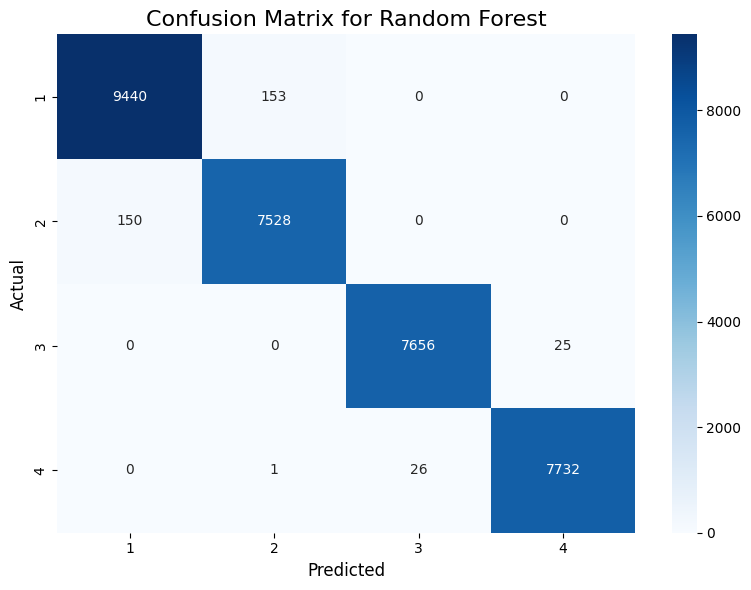

In [30]:
#Generating Confusion Matrix (Random Forest)
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Random Forest', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()


Feature Importance:
                              Importance
Price                           0.347294
Colour                          0.260280
Location                        0.125627
Page                            0.111900
Is Higher Than Average Price    0.065789
Photography Type                0.040118
Session ID                      0.014043
Order                           0.013112
Country                         0.013058
Day                             0.006686


C:\Users\Arnav\AppData\Local\Temp\ipykernel_24236\440659418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette='viridis')


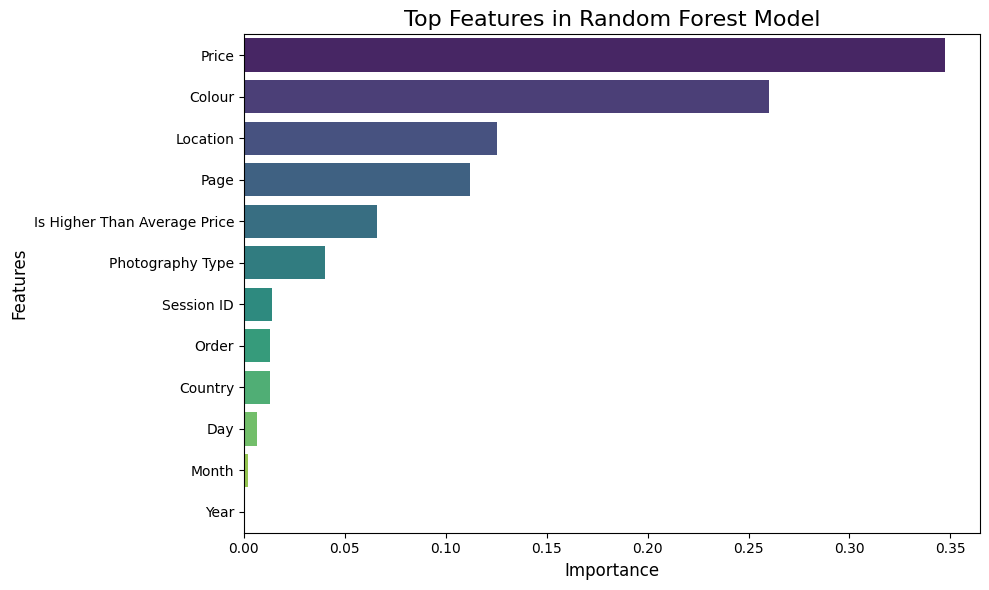

In [31]:
#Generating Feature Importance for understanding relevance of variables
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importances.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette='viridis')
plt.title('Top Features in Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [90]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest Regression MSE: 0.007139509645073523


In [89]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_reg))

Linear Regression MSE: 0.5582957921129116


In [59]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data_encoded' is the DataFrame with preprocessed features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)

In [51]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.96      0.96      9593
           2       0.98      0.96      0.97      7678
           3       0.97      0.97      0.97      7681
           4       0.97      0.99      0.98      7759

    accuracy                           0.97     32711
   macro avg       0.97      0.97      0.97     32711
weighted avg       0.97      0.97      0.97     32711



In [63]:
#KMeans Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
Df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[ 0.14648872 -0.12432715 -0.4483875  -2.48933938]
 [ 0.3995017  -0.36667556 -0.65752752  0.34825081]
 [-0.6069886   0.55387285  1.06537418  0.30856847]]


C:\Users\Arnav\AppData\Local\Temp\ipykernel_24236\2947485564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\Arnav\AppData\Local\Temp\ipykernel_24236\3059453952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Cluster'] = kmeans.fit_predict(Df.drop('Colour', axis=1))


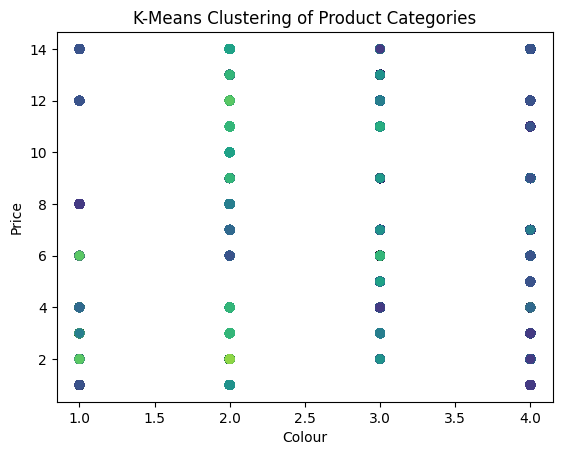

In [113]:
# K-Means Clustering Example with 3 clusters 
kmeans = KMeans(n_clusters=3)
Df['Cluster'] = kmeans.fit_predict(Df.drop('Colour', axis=1))

# Visualizing Clusters 
plt.scatter(Df['Product Category'], Df['Colour'], c=Df['Price'])
plt.title('K-Means Clustering of Product Categories')
plt.xlabel('Colour')
plt.ylabel('Price')
plt.show()

In [88]:
#Neural Network Classification
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)

print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))

Neural Network Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      9593
           2       0.99      0.97      0.98      7678
           3       1.00      1.00      1.00      7681
           4       1.00      1.00      1.00      7759

    accuracy                           0.99     32711
   macro avg       0.99      0.99      0.99     32711
weighted avg       0.99      0.99      0.99     32711



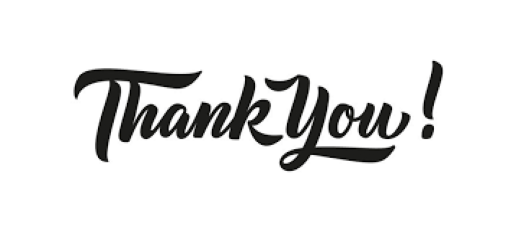

In [107]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\Arnav\Desktop\Thank you.png")

imgplot = plt.imshow(img)
plt.axis('off')
plt.show()